# COMP 6602
#Machine Learning I
### Homework 3
### Khoula Al Kharusi

In [2]:
#@title Common Imoprts
import pandas as pd
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, recall_score, roc_auc_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA, NMF

In [3]:
#@title Plot Confusion Matrix 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
# Load data
faces = datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [ ]:
# images 0 -> image size
faces.images[0].shape

(64, 64)

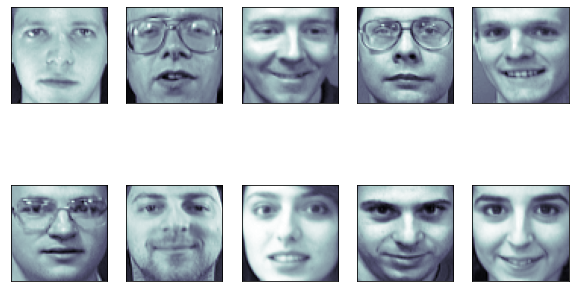

In [ ]:

fig = plt.figure(figsize=(10, 6))
# show some images
for i in range(10):
    ax = fig.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i*10], cmap=plt.cm.bone)

In [ ]:
#@title Train-Test Split (280 : 120)
X_train, X_test, y_train, y_test = train_test_split(faces.data,
        faces.target,test_size=0.3 ,random_state=0, stratify=faces.target)

print(X_train.shape, X_test.shape)

(280, 4096) (120, 4096)


## Apply SVM Classification in the dataset

In [ ]:
# use SVM for classification
# create the svm object and fit it to train data
grid = {'C': [0.1, 1, 10, 100, 1000],
        'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
        'kernel': ['linear','rbf', 'poly', 'sigmoid']
       }
svm =SVC()
svm_cv=GridSearchCV(svm,grid,cv=5)
svm_cv.fit(X_train, y_train)

print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)


tuned hpyerparameters :(best parameters)  {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
accuracy : 0.9535714285714285


In [ ]:
svc =SVC(C = 0.1, gamma = 'scale', kernel = 'linear')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print('Support Vector Machine Classification Evaluation')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average=None))
print('Recall:', recall_score(y_test, y_pred, average=None))
print('f1-score:', f1_score(y_test, y_pred, average=None))

Support Vector Machine Classification Evaluation
Accuracy: 0.9166666666666666
Precision: [1.         1.         0.75       0.75       1.         0.75
 1.         0.66666667 1.         1.         1.         1.
 0.5        1.         0.75       1.         1.         1.
 1.         1.         1.         1.         0.75       1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         0.75       0.75      ]
Recall: [0.33333333 1.         1.         1.         0.66666667 1.
 1.         0.66666667 1.         0.66666667 1.         1.
 0.66666667 1.         1.         1.         1.         1.
 1.         1.         1.         0.66666667 1.         1.
 1.         0.33333333 1.         1.         1.         1.
 1.         0.66666667 1.         1.         1.         1.
 1.         1.         1.         1.        ]
f1-score: [0.5        1.         0.85714286 0.85714286 0.8        0.85714286
 1.         0.66666667 1

Confusion matrix, without normalization
[[1 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 3]]


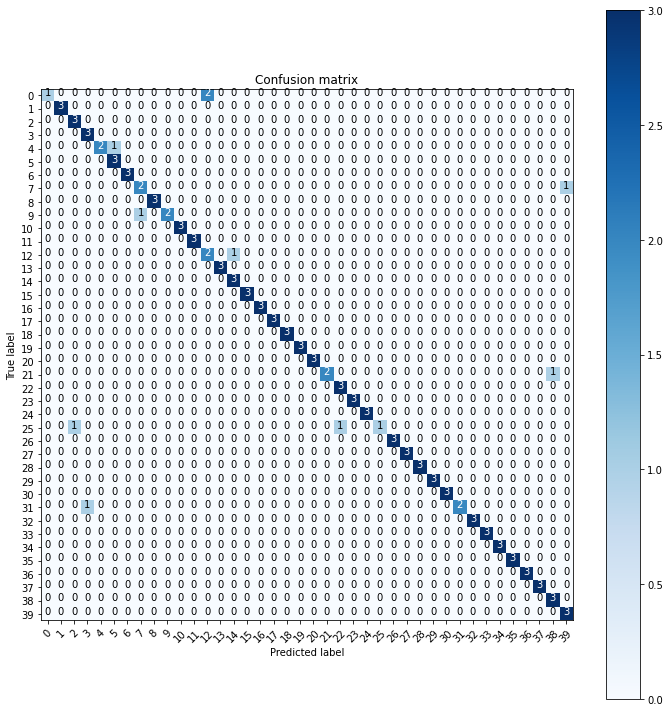

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred,labels=list(range(40)))
# Plot non-normalized confusion matrix
plt.figure(figsize = (10, 10))
plot_confusion_matrix(cnf_matrix, classes= list(range(40)),
                      title='Confusion matrix')

# Dataset Decomposition

In [ ]:
n_components = 30

## PCA

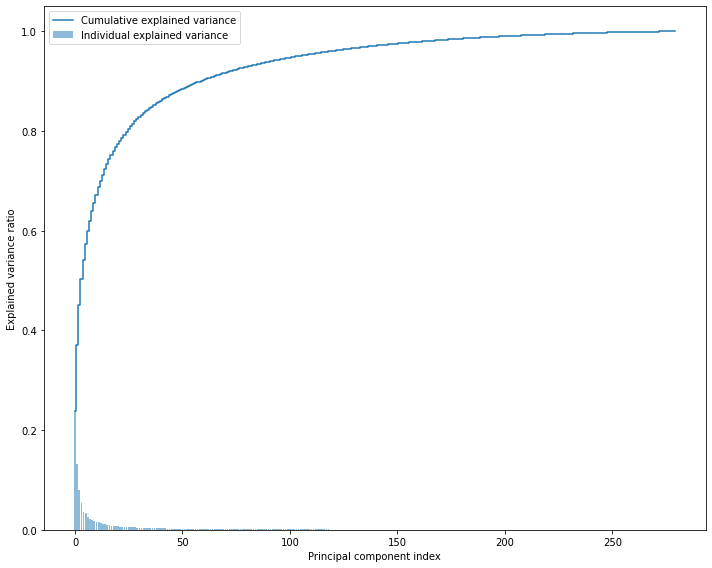

In [ ]:
pca = PCA()

# Determine transformed features

X_train_pca = pca.fit_transform(X_train)

# Determine explained variance using explained_variance_ration_ attribute

exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot

plt.figure(figsize=(10, 8))
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
i = 0
while cum_sum_eigenvalues[i]<.9:
  i+=1
print(cum_sum_eigenvalues[i])
print(i)

0.9008883
59


In [ ]:
# create the object pca with 3 principal components
pca = PCA(n_components=n_components, whiten=True)
# Fit it to training data
pca.fit(X_train)

PCA(n_components=30, whiten=True)

In [ ]:
mean_pca = pca.mean_
mean_pca.shape

(4096,)

In [ ]:
mean_pca_2d = mean_pca.reshape(64,64)

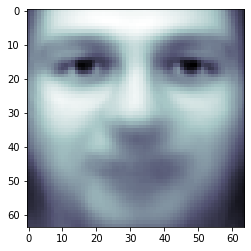

In [ ]:
plt.imshow(mean_pca_2d,cmap=plt.cm.bone)
plt.show()

In [ ]:
z = pca.components_
z.shape

(30, 4096)

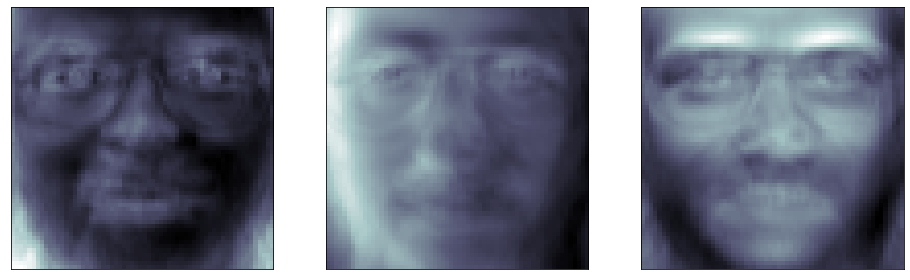

In [ ]:
fig = plt.figure(figsize=(16, 6))
for i in range(3):
    ax = fig.add_subplot(1, 3, i + 1, xticks=[], yticks=[])
    ax.imshow(z[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)

In [ ]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape, X_test_pca.shape)

(280, 30) (120, 30)


In [ ]:

svm_pca =SVC()
svm_pca_cv=GridSearchCV(svm_pca,grid,cv=5)
svm_pca_cv.fit(X_train_pca, y_train)

print("tuned hpyerparameters :(best parameters) ",svm_pca_cv.best_params_)
print("accuracy :",svm_pca_cv.best_score_)


tuned hpyerparameters :(best parameters)  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
accuracy : 0.9678571428571429


In [ ]:

svc_pca =SVC(C = 10, gamma = 0.01, kernel = 'rbf')
svc_pca.fit(X_train_pca,y_train)
y_pred_pca = svc_pca.predict(X_test_pca)
print('Support Vector Machine Classification Evaluation')
print('Accuracy:', accuracy_score(y_test, y_pred_pca))
print('Precision:', precision_score(y_test, y_pred_pca, average=None))
print('Recall:', recall_score(y_test, y_pred_pca, average=None))
print('f1-score:', f1_score(y_test, y_pred_pca, average=None))

Support Vector Machine Classification Evaluation
Accuracy: 0.925
Precision: [1.         1.         0.6        1.         1.         1.
 1.         0.66666667 1.         1.         1.         1.
 1.         1.         0.75       1.         1.         1.
 1.         1.         0.75       1.         0.75       1.
 0.75       1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         0.75       0.75      ]
Recall: [0.33333333 1.         1.         1.         1.         1.
 1.         0.66666667 1.         0.66666667 1.         1.
 0.33333333 1.         1.         1.         1.         1.
 1.         1.         1.         0.66666667 1.         1.
 1.         0.33333333 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]
f1-score: [0.5        1.         0.75       1.         1.         1.
 1.         0.66666667 1.         0.8        1.

Confusion matrix, without normalization
[[1 0 0 ... 0 0 1]
 [0 3 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 3]]


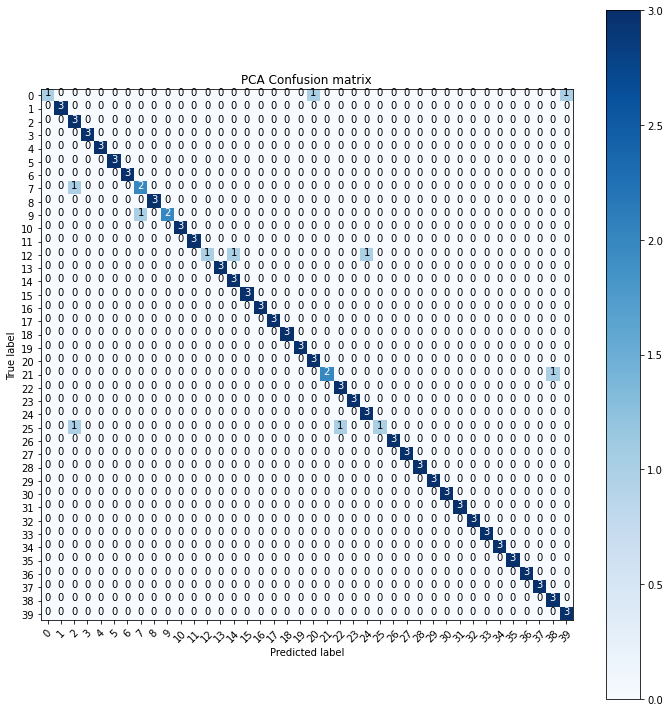

In [ ]:
cnf_pca_matrix = confusion_matrix(y_test, y_pred_pca,labels=list(range(40)))
# Plot non-normalized confusion matrix
plt.figure(figsize = (10, 10))
plot_confusion_matrix(cnf_pca_matrix, classes= list(range(40)),
                      title='PCA Confusion matrix')

## NMF

In [ ]:
# create the object pca with 3 principal components
nmf = NMF(n_components= n_components, init="random", tol=5e-3)
# Fit it to training data
nmf.fit(X_train)


NMF(init='random', n_components=30, tol=0.005)

In [ ]:
w = nmf.components_
w.shape

(30, 4096)

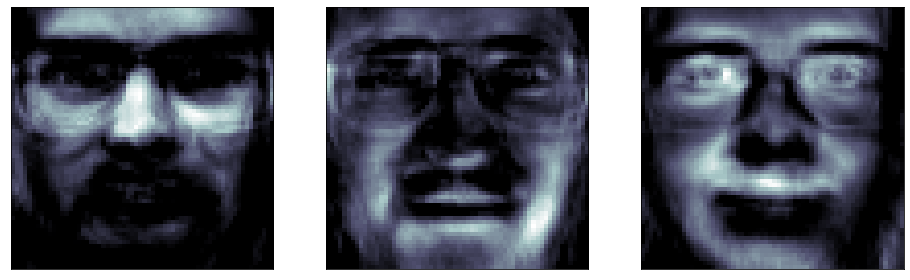

In [ ]:
fig = plt.figure(figsize=(16, 6))
for i in range(3):
    ax = fig.add_subplot(1, 3, i + 1, xticks=[], yticks=[])
    ax.imshow(w[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)

In [ ]:
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)
print(X_train_nmf.shape, X_test_nmf.shape)

(280, 30) (120, 30)


In [ ]:
svm_nmf =SVC()
svm_nmf_cv=GridSearchCV(svm_nmf,grid,cv=5)
svm_nmf_cv.fit(X_train_nmf, y_train)

print("tuned hpyerparameters :(best parameters) ",svm_nmf_cv.best_params_)
print("accuracy :",svm_nmf_cv.best_score_)


tuned hpyerparameters :(best parameters)  {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
accuracy : 0.9214285714285714


In [ ]:
svc_nmf =SVC(C = 10, gamma = 'scale', kernel = 'linear')
svc_nmf.fit(X_train_nmf,y_train)
y_pred_nmf = svc_nmf.predict(X_test_nmf)
print('Support Vector Machine Classification Evaluation')
print('Accuracy:', accuracy_score(y_test, y_pred_nmf))
print('Precision:', precision_score(y_test, y_pred_nmf, average=None))
print('Recall:', recall_score(y_test, y_pred_nmf, average=None))
print('f1-score:', f1_score(y_test, y_pred_nmf, average=None))

Support Vector Machine Classification Evaluation
Accuracy: 0.8916666666666667
Precision: [0.5        1.         0.75       0.75       1.         0.75
 1.         0.66666667 1.         1.         1.         1.
 0.33333333 1.         1.         1.         1.         1.
 1.         1.         0.75       1.         1.         1.
 0.75       1.         1.         1.         0.75       1.
 1.         1.         1.         1.         0.75       1.
 1.         1.         0.75       0.75      ]
Recall: [0.33333333 1.         1.         1.         0.66666667 1.
 1.         0.66666667 1.         0.66666667 1.         1.
 0.33333333 1.         1.         1.         0.66666667 1.
 1.         1.         1.         0.66666667 0.66666667 1.
 1.         0.33333333 1.         1.         1.         1.
 1.         0.66666667 1.         1.         1.         1.
 1.         1.         1.         1.        ]
f1-score: [0.4        1.         0.85714286 0.85714286 0.8        0.85714286
 1.         0.66666667 1

Confusion matrix, without normalization
[[1 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 3]]


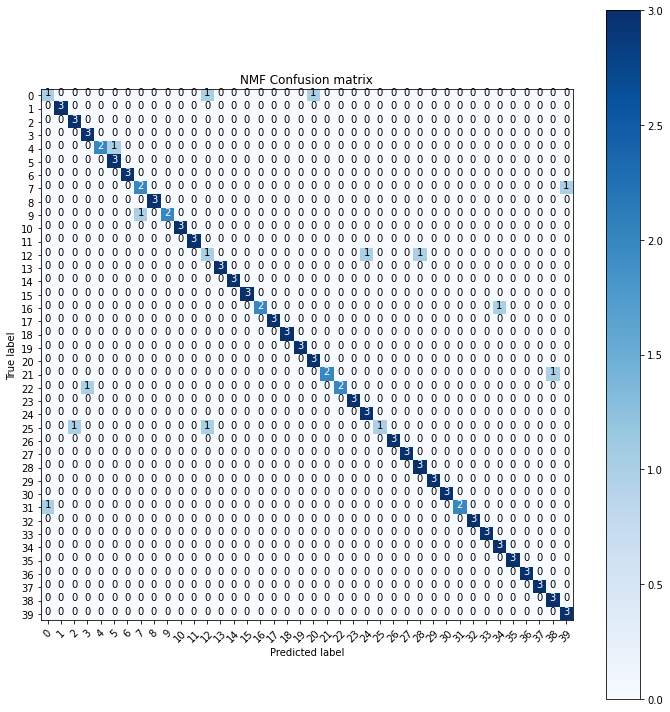

In [ ]:
cnf_nmf_matrix = confusion_matrix(y_test, y_pred_nmf,labels=list(range(40)))
# Plot non-normalized confusion matrix
plt.figure(figsize = (10, 10))
plot_confusion_matrix(cnf_nmf_matrix, classes= list(range(40)),
                      title='NMF Confusion matrix')

# Evaluation
In the previous part mainly focused in the process and finding the best SVM classifire for the dataset in the tree spaces (original space, PCA z space, NMF w space). In this part we will evaluate the decomposition algorithms with different compenent values. The SVM classifer for PCA and NMF are the best found from gridsearch.

In [ ]:
#@title misclassified functions
def misclassified(y_test, y_pred):
  for i in range(len(y_test)):
    if y_test[i] != y_pred[i]:
      print('predicted as {} actual label is {}'.format(y_pred[i], y_test[i]))
      plt.figure(figsize=(10, 5))
      plt.subplot(1,2,1), plt.imshow(X_test[i].reshape(faces.images[0].shape), cmap='gray') ,plt.title('Misclassified Image',  fontsize=20)
      plt.subplot(1,2,2), plt.imshow(faces.images[y_pred[i]*10],  cmap='gray') ,plt.title('Classifide as ',  fontsize=20);

def classified(y_test, y_pred, N = 5):
  total = 0
  for i in range(len(y_test)):
    if y_test[i] == y_pred[i]:
      total += 1
      print('Correctly classified as {}'.format(y_pred[i], y_test[i]))
      plt.figure(figsize=(10, 5))
      plt.subplot(1,2,1), plt.imshow(X_test[i].reshape(faces.images[0].shape), cmap='gray') ,plt.title('classified Image',  fontsize=20)
      plt.subplot(1,2,2), plt.imshow(faces.images[y_pred[i]*10],  cmap='gray') ,plt.title('Classifide as ',  fontsize=20);
    if total >= N:
      return

In [ ]:
#@title PCA and NMF functions
def pca_function(n_components, missed = False, correct = False, N= 5):
  print('PCA With {} dimensional space'.format(n_components))
  # create the object pca with 3 principal components
  pca = PCA(n_components=n_components, whiten=True)
  # Fit it to training data
  pca.fit(X_train)
  X_train_pca = pca.transform(X_train)
  X_test_pca = pca.transform(X_test)
  svc_pca =SVC(C = 10, gamma = 0.01, kernel = 'rbf')
  svc_pca.fit(X_train_pca,y_train)
  y_pred_pca = svc_pca.predict(X_test_pca)

  eval_list = [n_components,
               accuracy_score(y_test, y_pred_pca),
               precision_score(y_test, y_pred_pca, average='macro'),
               recall_score(y_test, y_pred_pca, average='macro'),
               f1_score(y_test, y_pred_pca, average='macro')
               ]
  if misclassified:
    print("misclassified images")
    misclassified(y_test, y_pred_pca)
  if correct:
    print('5 Sampels of classified images')
    classified(y_test, y_pred_pca, N)
  return(eval_list)


def nmf_function(n_components, missed = False, correct = False, N = 5):
  print('NMF With {} dimensional space'.format(n_components))
  # create the object nmf with 3 principal components
  nmf = NMF(n_components= n_components, init="random", tol=5e-3)
  # Fit it to training data
  nmf.fit(X_train)
  X_train_nmf = nmf.transform(X_train)
  X_test_nmf = nmf.transform(X_test)
  svc_nmf =SVC(C = 10, gamma = 'scale', kernel = 'linear')
  svc_nmf.fit(X_train_nmf,y_train)
  y_pred_nmf = svc_nmf.predict(X_test_nmf)

  eval_list = [n_components,
               accuracy_score(y_test, y_pred_nmf),
               precision_score(y_test, y_pred_nmf, average='macro'),
               recall_score(y_test, y_pred_nmf, average='macro'),
               f1_score(y_test, y_pred_nmf, average='macro')
               ]
  if misclassified == True:
    print("misclassified images")
    misclassified(y_test, y_pred_nmf)
  if correct == True:
    print('5 Sampels of classified images')
    classified(y_test, y_pred_nmf, N)
  return(eval_list)


In [ ]:
all_nmf_nndsvdb = []
for i in range(5, 200, 5):
  all_nmf_nndsvdb.append(nmf_function(i,  missed = False, correct = False))
from google.colab import data_table
data_table.enable_dataframe_formatter()

nmf_table_nndsvdb = pd.DataFrame(all_nmf_nndsvdb, columns =['r','Accuracy', 'Precision', 'Recall', 'F1 score'])
nmf_table_nndsvdb

NMF With 5 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NMF With 10 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


NMF With 15 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


NMF With 20 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


NMF With 25 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


NMF With 30 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


NMF With 35 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


NMF With 40 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


NMF With 45 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


NMF With 50 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


NMF With 55 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


NMF With 60 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NMF With 65 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NMF With 70 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NMF With 75 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


NMF With 80 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NMF With 85 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NMF With 90 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


NMF With 95 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


NMF With 100 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NMF With 105 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


NMF With 110 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


NMF With 115 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


NMF With 120 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


NMF With 125 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NMF With 130 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


NMF With 135 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


NMF With 140 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


NMF With 145 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


NMF With 150 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NMF With 155 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


NMF With 160 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NMF With 165 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


NMF With 170 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


NMF With 175 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NMF With 180 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NMF With 185 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NMF With 190 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NMF With 195 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


,r,Accuracy,Precision,Recall,F1 score
0,5,0.541667,0.555714,0.541667,0.533095
1,10,0.833333,0.867083,0.833333,0.823690
2,15,0.891667,0.923333,0.891667,0.888750
3,20,0.883333,0.909167,0.883333,0.876548
4,25,0.883333,0.907083,0.883333,0.877976
5,30,0.875000,0.898750,0.875000,0.868929
6,35,0.866667,0.906250,0.866667,0.866349
7,40,0.891667,0.917500,0.891667,0.886071
8,45,0.858333,0.904167,0.858333,0.853214
9,50,0.875000,0.895833,0.875000,0.868929


In [ ]:
all_pca = []
all_nmf = []
for i in range(5, 200, 5):
  all_pca.append(pca_function(i))
  all_nmf.append(nmf_function(i))

PCA With 5 dimensional space
NMF With 5 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


PCA With 10 dimensional space
NMF With 10 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


PCA With 15 dimensional space
NMF With 15 dimensional space
PCA With 20 dimensional space
NMF With 20 dimensional space
PCA With 25 dimensional space
NMF With 25 dimensional space
PCA With 30 dimensional space
NMF With 30 dimensional space
PCA With 35 dimensional space
NMF With 35 dimensional space
PCA With 40 dimensional space
NMF With 40 dimensional space
PCA With 45 dimensional space
NMF With 45 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


PCA With 50 dimensional space
NMF With 50 dimensional space
PCA With 55 dimensional space
NMF With 55 dimensional space
PCA With 60 dimensional space
NMF With 60 dimensional space
PCA With 65 dimensional space
NMF With 65 dimensional space
PCA With 70 dimensional space
NMF With 70 dimensional space
PCA With 75 dimensional space
NMF With 75 dimensional space
PCA With 80 dimensional space
NMF With 80 dimensional space
PCA With 85 dimensional space
NMF With 85 dimensional space
PCA With 90 dimensional space
NMF With 90 dimensional space
PCA With 95 dimensional space
NMF With 95 dimensional space
PCA With 100 dimensional space
NMF With 100 dimensional space
PCA With 105 dimensional space
NMF With 105 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


PCA With 110 dimensional space
NMF With 110 dimensional space
PCA With 115 dimensional space
NMF With 115 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


PCA With 120 dimensional space
NMF With 120 dimensional space
PCA With 125 dimensional space
NMF With 125 dimensional space
PCA With 130 dimensional space
NMF With 130 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


PCA With 135 dimensional space
NMF With 135 dimensional space
PCA With 140 dimensional space
NMF With 140 dimensional space
PCA With 145 dimensional space
NMF With 145 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


PCA With 150 dimensional space
NMF With 150 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


PCA With 155 dimensional space
NMF With 155 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


PCA With 160 dimensional space
NMF With 160 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


PCA With 165 dimensional space
NMF With 165 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


PCA With 170 dimensional space
NMF With 170 dimensional space
PCA With 175 dimensional space
NMF With 175 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


PCA With 180 dimensional space
NMF With 180 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


PCA With 185 dimensional space
NMF With 185 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


PCA With 190 dimensional space
NMF With 190 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


PCA With 195 dimensional space
NMF With 195 dimensional space


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

pca_table = pd.DataFrame(all_pca, columns =['no_Components','Accuracy', 'Precision', 'Recall', 'F1 score'])
pca_table

,Accuracy,Precision,Recall,F1 score
0,0.608333,0.622321,0.608333,0.591131
1,0.875000,0.909583,0.875000,0.868036
2,0.925000,0.935417,0.925000,0.919167
3,0.916667,0.927083,0.916667,0.910833
4,0.925000,0.935833,0.925000,0.920298
5,0.925000,0.944167,0.925000,0.916488
6,0.916667,0.933750,0.916667,0.910893
7,0.908333,0.935417,0.908333,0.902262
8,0.916667,0.940417,0.916667,0.908810
9,0.925000,0.946667,0.925000,0.919881


In [ ]:
nmf_table = pd.DataFrame(all_nmf, columns =['no_Components','Accuracy', 'Precision', 'Recall', 'F1 score'])
nmf_table

,Accuracy,Precision,Recall,F1 score
0,0.558333,0.574167,0.558333,0.534325
1,0.808333,0.844167,0.808333,0.801829
2,0.891667,0.912917,0.891667,0.885417
3,0.916667,0.929167,0.916667,0.910595
4,0.891667,0.919167,0.891667,0.885655
5,0.925000,0.951250,0.925000,0.920536
6,0.908333,0.927500,0.908333,0.904821
7,0.908333,0.938750,0.908333,0.903393
8,0.900000,0.901250,0.900000,0.885893
9,0.916667,0.937917,0.916667,0.910417


### Misclassified Images Analysis

PCA With 30 dimensional space
misclassified images
predicted as 2 actual label is 7
predicted as 7 actual label is 9
predicted as 2 actual label is 25
predicted as 20 actual label is 0
predicted as 39 actual label is 0
predicted as 22 actual label is 25
predicted as 38 actual label is 21
predicted as 14 actual label is 12
predicted as 24 actual label is 12
5 Sampels of classified images
Correctly classified as 4
Correctly classified as 10
Correctly classified as 33
Correctly classified as 37
Correctly classified as 10


[30, 0.925, 0.9441666666666666, 0.925, 0.9164880952380953]

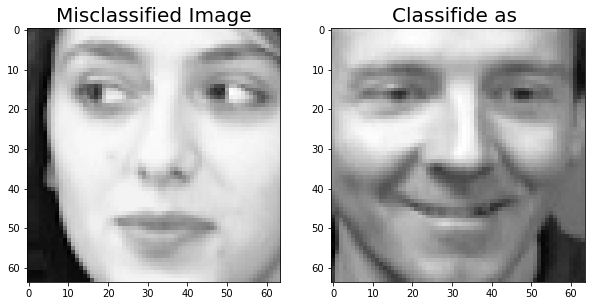

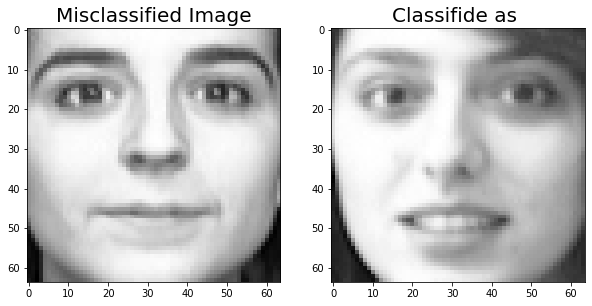

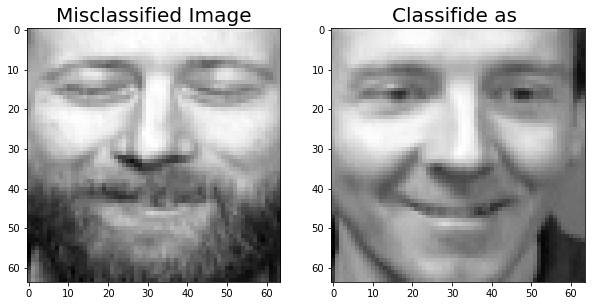

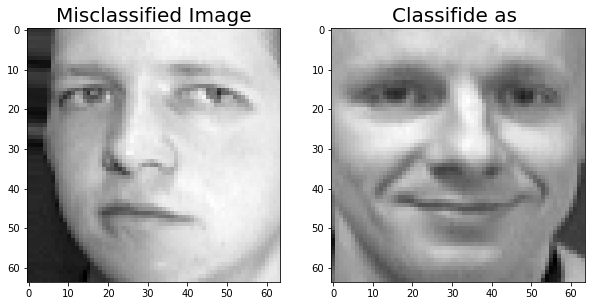

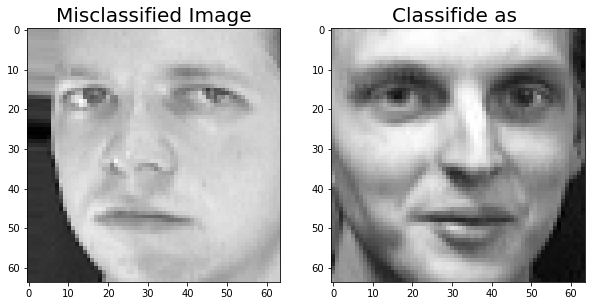

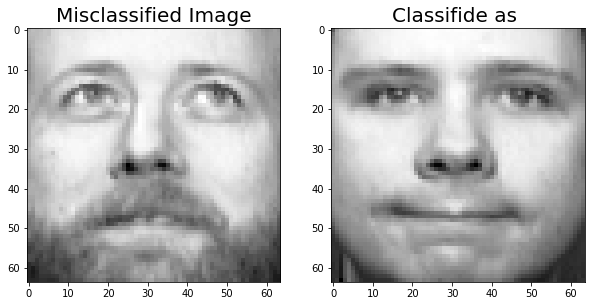

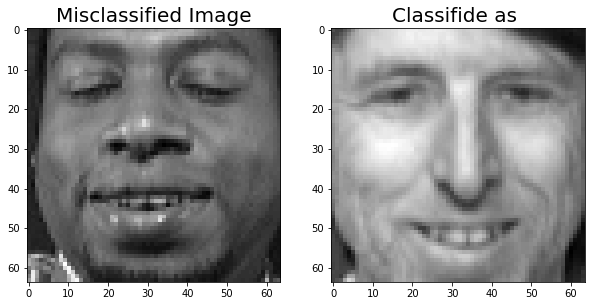

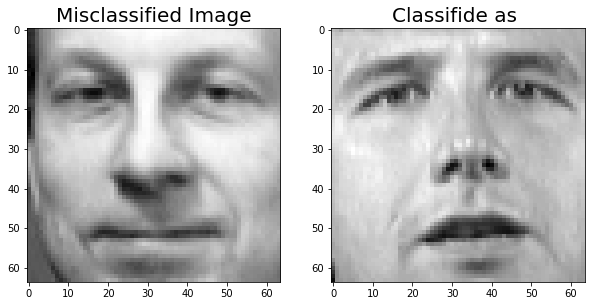

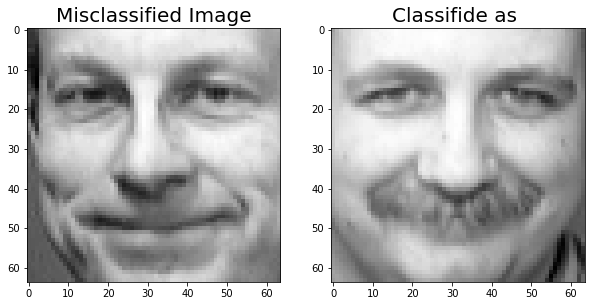

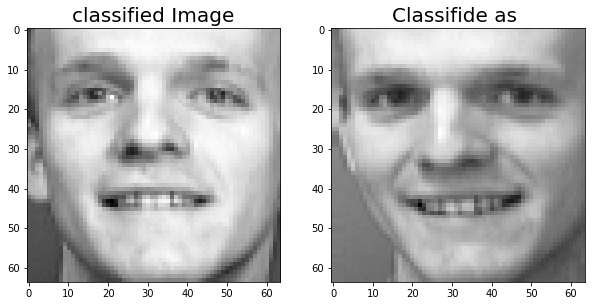

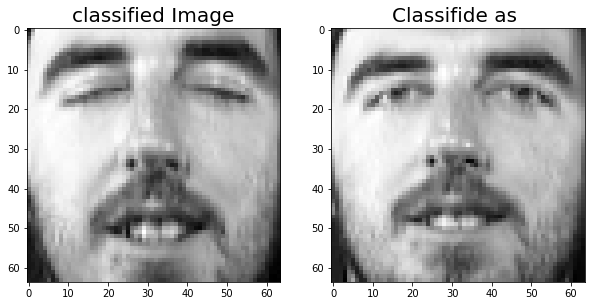

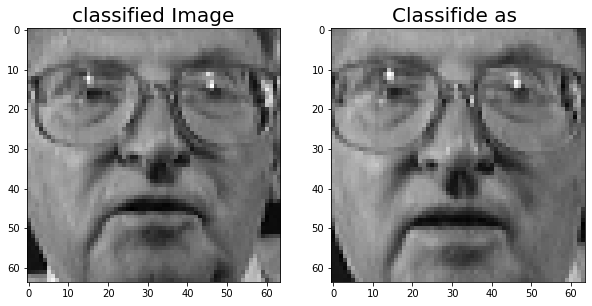

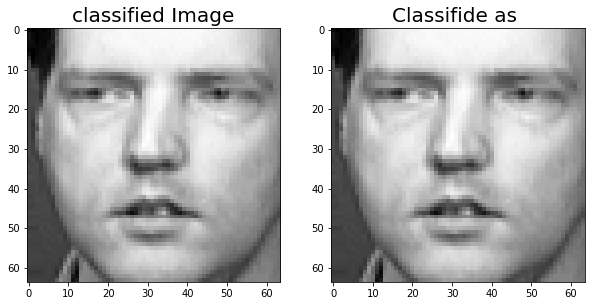

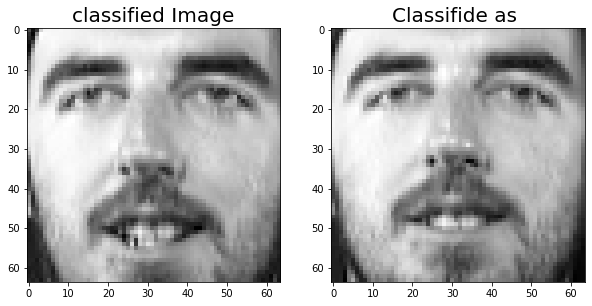

In [ ]:
#@title Face classifications with PCA Analysis
show_misclassification = True #@param {type:"boolean"}
show_Correct_classification = True #@param {type:"boolean"}
sampels = 5 #@param {type:"integer"}
pca_function(30, show_misclassification, show_Correct_classification)

NMF With 30 dimensional space
misclassified images
predicted as 39 actual label is 4
predicted as 2 actual label is 7
predicted as 39 actual label is 2
predicted as 7 actual label is 9
predicted as 20 actual label is 0
predicted as 12 actual label is 0
predicted as 3 actual label is 14
predicted as 38 actual label is 21
predicted as 31 actual label is 26
predicted as 38 actual label is 31
predicted as 3 actual label is 12
predicted as 12 actual label is 26
predicted as 34 actual label is 12
5 Sampels of classified images
Correctly classified as 10
Correctly classified as 33
Correctly classified as 37
Correctly classified as 10
Correctly classified as 28


[30,
 0.8916666666666667,
 0.9158333333333333,
 0.8916666666666666,
 0.8874404761904762]

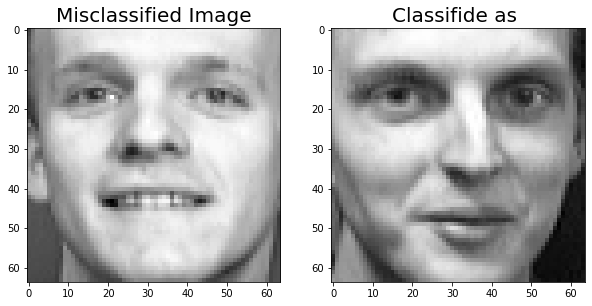

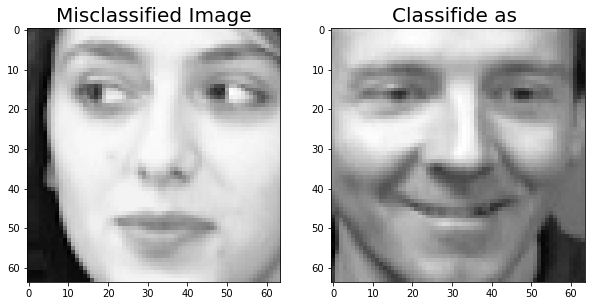

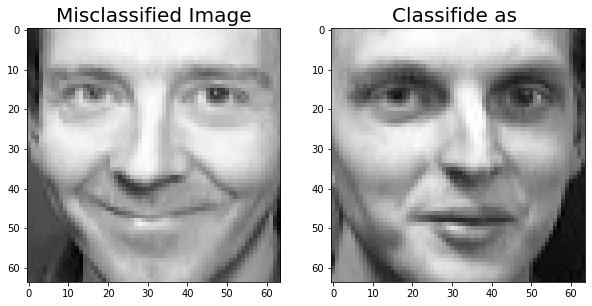

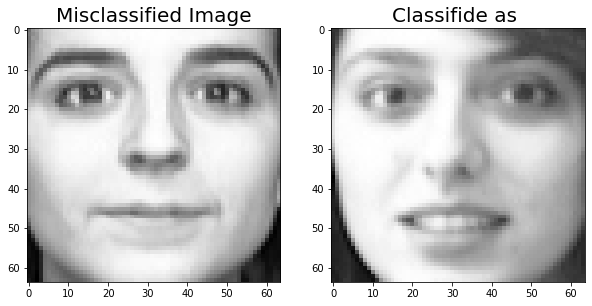

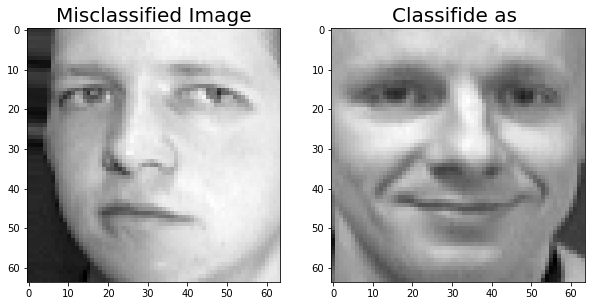

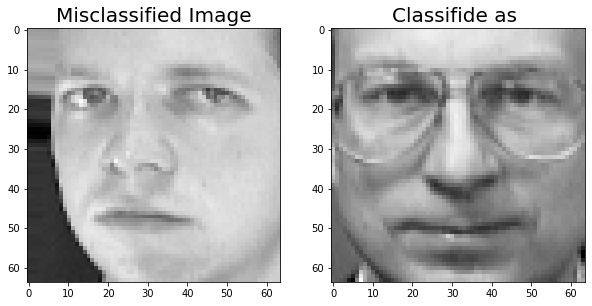

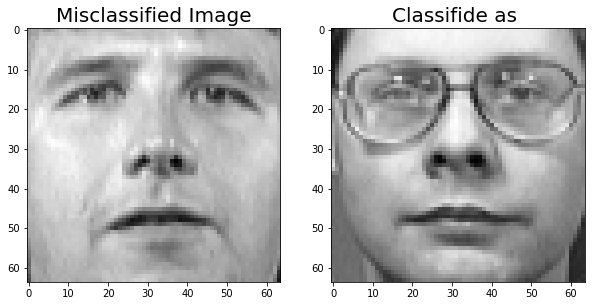

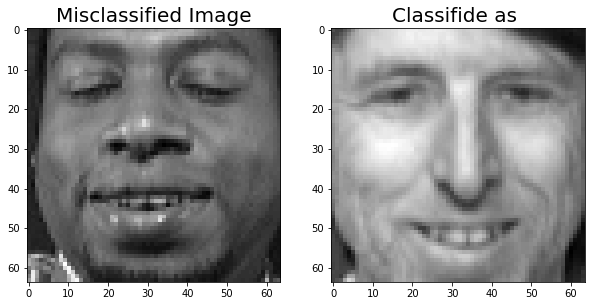

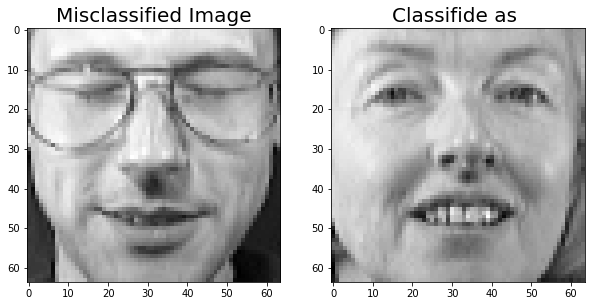

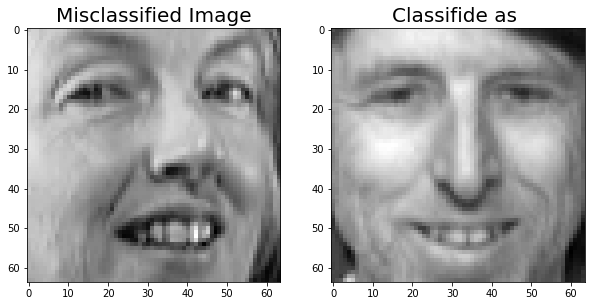

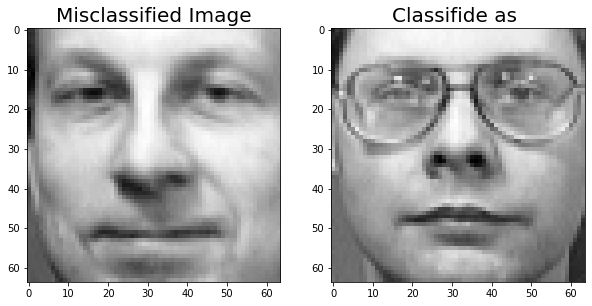

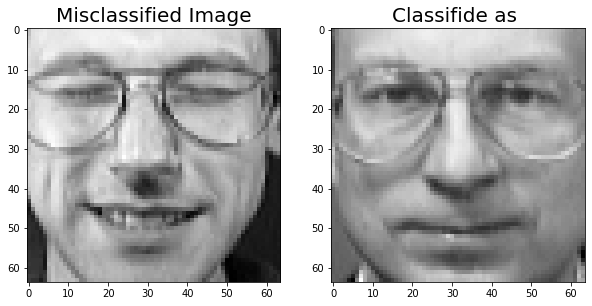

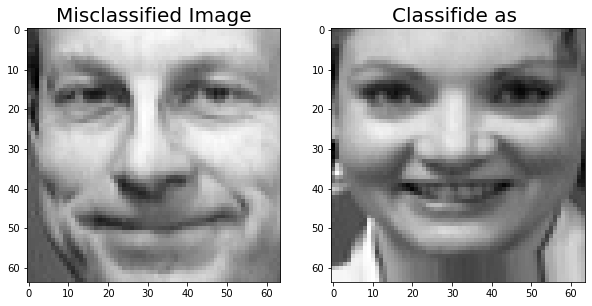

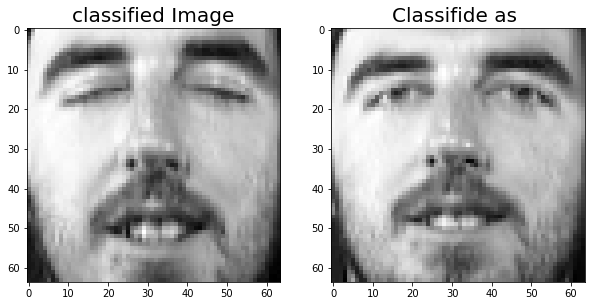

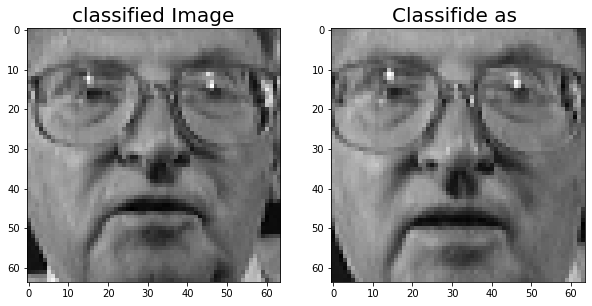

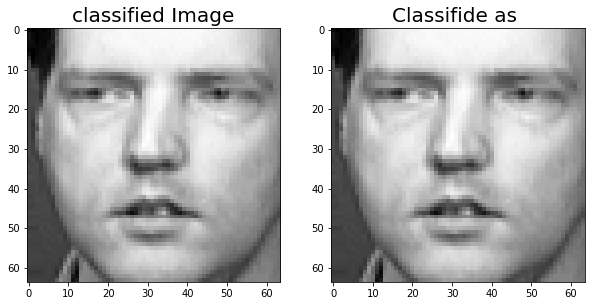

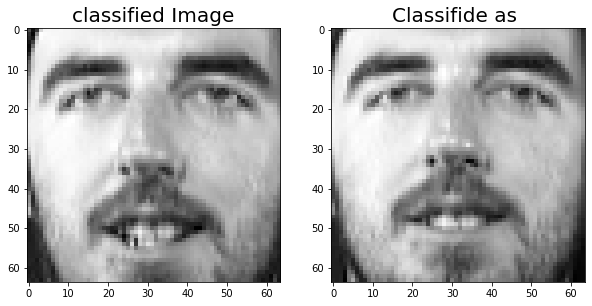

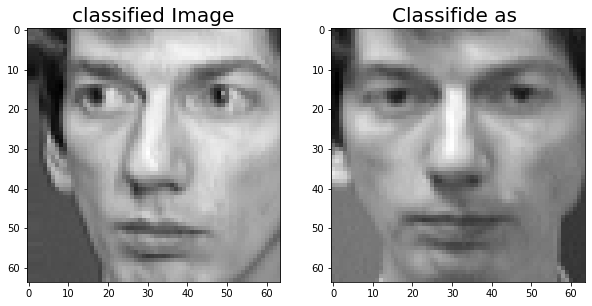

In [ ]:
#@title Face classifications with NMF Analysis
show_misclassification = True #@param {type:"boolean"}
show_Correct_classification = True #@param {type:"boolean"}
sampels = 5 #@param {type:"integer"}
nmf_function(30, show_misclassification, show_Correct_classification)